<img alt="Colaboratory logo" width="100%" src="img/capa.png">

*by [Joviano Silveira](https://joviano.com)*

---

# Análise dos Dados do Airbnb - *SANTIAGO [CHILE]*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade SANTIAGO (CHILE), e ver quais insights podem ser extraídos a partir de dados RESUMIDOS brutos.**

## 1. Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import decimal
import pandas_datareader as pdr
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
# Dados estão no GITHUB => https://github.com/jovianosilveira
df = pd.read_csv('dados/10_listings.csv')

# amostra dos dados
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-02-22,0.54,1,216,6,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,43058,3,0,NaN,NaN,2,178,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,43870,1,45,2019-04-22,0.43,3,2,0,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2017-06-10,0.59,1,365,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


## 1.1 Análise dos Dados


**Dicionário das variáveis**

- **id**: Número de identificação do imóvel;
- **name**: Descrição do imóvel;
- **host_id**: Número de identificação do Hospedeiro;
- **host_name**: Nome do Hospedeiro;
- **neighbourhood_group**: 
- **neighbourhood**: Nome do bairro;
- **latitude**: Número decimal informando Latitude;
- **longitude**:  Número decimal informando Longitude;
- **room_type**: Tipo de imóvel;
- **price**: Preço por noite;
- **minimum_nights**: Número mínimo de noites;
- **number_of_reviews**: Quantidade de avaliações;
- **last_review**: Data da última avaliação;
- **reviews_per_month**: Número de avaliações por mês;
- **calculated_host_listings_count**: Quantidade de imóves que o Hospedeiro possui;
- **availability_365**: Quantidade de dias disponíveis nos próximos 12 meses;
- **number_of_reviews_ltm**: Número de avaliações no último ano;
- **license**

Mais detalhes, disponíveis na documentação completa, [clicando aqui](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### 2. Perguntas a ser respondidas

> A seguir vamos desenvolver o projeto sobre respostas de perguntas que estão vinculadas entre si (uma puxa a outra)

### **2.1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [3]:
# identificando o volume de dados do DataFrame
linhas = df.shape[0]
colunas = df.shape[1]

print(f'''
Nosso conjunto de dados, apresentado anteriormente, possui {linhas} linhas (entradas) e {colunas} colunas (variáveis / dimensões).
''')


Nosso conjunto de dados, apresentado anteriormente, possui 9231 linhas (entradas) e 18 colunas (variáveis / dimensões).



Necessitamos saber como são os tipos de dados de cada coluna (serie) da tabela (dataframe), e para isso vamos usar um `for` simples para organizar a impressão em tela.

In [4]:
# verificando o tipo de dados do DataSet
for i in dict(df.dtypes).items():
    variavel = i[0]
    caracteres = '.'*(40-len(variavel))
    tipo = i[1]
    print(f'A variável [{variavel}]{caracteres} é do tipo {tipo}')

A variável [id]...................................... é do tipo int64
A variável [name].................................... é do tipo object
A variável [host_id]................................. é do tipo int64
A variável [host_name]............................... é do tipo object
A variável [neighbourhood_group]..................... é do tipo float64
A variável [neighbourhood]........................... é do tipo object
A variável [latitude]................................ é do tipo float64
A variável [longitude]............................... é do tipo float64
A variável [room_type]............................... é do tipo object
A variável [price]................................... é do tipo int64
A variável [minimum_nights].......................... é do tipo int64
A variável [number_of_reviews]....................... é do tipo int64
A variável [last_review]............................. é do tipo object
A variável [reviews_per_month]....................... é do tipo float64
A variá

### **2.2. Qual a porcentagem de valores ausentes no *dataset*?**

> A identificação de valores ausentes (nulos) é de suma importância, pois ele evidencia aquelas variaveis (colunas) que podem ser *um lixo*, atrapalhando as analises, e gastando memória / processamento a toa.

In [5]:
# Contando de dados ausentes em cada coluna
qtd_nulos_por_variavel = df.isnull().sum()

# Verificando a relação deste valor calculado, com o numero total de linhas (calculado anteriormente)
tabela_nulos = pd.DataFrame (qtd_nulos_por_variavel / linhas, columns=['percentual'])

# Organizando do maior para o menor
tabela_nulos = tabela_nulos.sort_values('percentual', ascending=False)

# Transformando em base 100 para facilitar a leitura
tabela_nulos['percentual'] = round(tabela_nulos['percentual']*100,1)

# Filtrando somente as colunas que mostraram dados nulos
tabela_nulos.query('percentual > 0')

,percentual
neighbourhood_group,100.0
license,98.8
reviews_per_month,36.8
last_review,36.8


> Podemos observar que a variável `neighbourhood_group` não apresenta informações, e que a coluna `license` possui pouquissimas informações.

> Na documentação temos poucas informações sobre license, mas para garantir que ela pode ser descartada, vamos criar uma matriz de correlação dela.
>
> Para poder analisar, vamos criar uma variável dizendo se a coluna `license` foi preenchida, pois com isso conseguiremos fazer algum tipo de correlação, uma vez que esta variável em seu estado original, mencionado no inicio desse projeto, é um `tipo object`, ou seja, um texto corrido. 

In [6]:
# isolando a nova variável do conjunto original
df_license = df.copy()

# Criando uma coluna binária (0 ou 1) informando se a variável `license` está preenchida
df_license['license_SN'] = df_license.apply(lambda x: 1 if x['license'] == np.nan  else 0 , axis = 1)

# Fazendo a correlação da coluna criada com as demais variáveis
df_license.corr()['license_SN']

id                               NaN
host_id                          NaN
neighbourhood_group              NaN
latitude                         NaN
longitude                        NaN
price                            NaN
minimum_nights                   NaN
number_of_reviews                NaN
reviews_per_month                NaN
calculated_host_listings_count   NaN
availability_365                 NaN
number_of_reviews_ltm            NaN
license_SN                       NaN
Name: license_SN, dtype: float64

> Não identificamos relação entre `Haver Licença` com qualquer outra variável, mostrando que como ela tem muitos valores ausentes, também poderá ser descartada.

In [7]:
df = df.drop(columns=['license', 'neighbourhood_group'], errors= 'ignore')
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,30950,"Apartment Providencia, Santiago",132845,Pamela,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-02-22,0.54,1,216,6
1,49392,Share my Flat in Providencia,224592,Maria,Providencia,-33.43266,-70.60072,Private room,43058,3,0,NaN,NaN,2,178,0
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,Providencia,-33.42959,-70.61880,Entire home/apt,43870,1,45,2019-04-22,0.43,3,2,0
3,53494,depto centro ski el colorado chile,249097,Paulina,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2017-06-10,0.59,1,365,1
4,55303,Plaza Lyon piso 3,261079,Hernan,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,52947911,Depto privado en Providencia,335913933,Vania,Providencia,-33.43159,-70.59256,Entire home/apt,68000,1,0,NaN,NaN,1,360,0
9227,52954420,Habitaciones y espacios comunes. Gran ubicación,136103530,Pedro,Ñuñoa,-33.46040,-70.60204,Private room,19920,1,0,NaN,NaN,1,364,0
9228,52955343,Big New Studio/Plaza Egaña/Sky100/pet-friendly,393438455,Lucas,La Reina,-33.45164,-70.57084,Entire home/apt,74286,2,0,NaN,NaN,3,41,0
9229,52960114,Bright & spacious apartment - great neighborhood,3223876,Charlotte,Providencia,-33.43830,-70.62793,Entire home/apt,31305,1,0,NaN,NaN,1,37,0


### **2.3. Qual o tipo de distribuição das variáveis?** 

> Representação da distribuição de frequencia das variáveis contidas na tabela após o tratamento das etapas anteriores

In [8]:
variaveis = ['price', 
             'minimum_nights', 
             'number_of_reviews', 
             'reviews_per_month', 
             'calculated_host_listings_count', 
             'availability_365', 
             'number_of_reviews_ltm'
            ]
df2 = df[variaveis].describe()
df2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.231000e+03,9231.000000,9231.000000,5838.000000,9231.000000,9231.000000,9231.000000
mean,7.725320e+04,7.135738,16.869570,0.850651,2.932185,246.390857,3.770989
std,8.308567e+05,27.475345,38.475486,1.292532,4.256402,126.674352,12.321971
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.000000e+04,1.000000,0.000000,0.100000,1.000000,137.000000,0.000000
50%,3.271400e+04,2.000000,2.000000,0.370000,1.000000,300.000000,0.000000
75%,5.000000e+04,3.000000,15.000000,1.087500,3.000000,364.000000,2.000000
max,5.280696e+07,600.000000,617.000000,23.620000,35.000000,365.000000,441.000000


> Podemos perceber que a coluna preço foi carregada com valores em notação cientifica, e para tratar isso, e já aproveitar para converter para BRL (reais), vamos usar uma função personalizada.

> Além disso os valores estão em moeda local, e como estamos analisando os dados aqui no Brasil, para que algum turista possa escolher pela viagem, vamos converter para moeda local

In [9]:
# informando a data dos dados, para poder parear as moedas
data_dos_dados = '2020-08-30'

# como não tem conversão direta entre CLP e BRL, usamos o DOLLAR como "trampolim"
conversao_na_data = pdr.get_data_yahoo(["CLPUSD=x", "USDBRL=x"])['Close'].loc[data_dos_dados]
fator_clp_brl = conversao_na_data[0] * conversao_na_data[1]

fator_clp_brl

0.006919127119210722

In [10]:
def NotacaoParaDecimal_brl(numero_em_notacao):
    
    x = numero_em_notacao 
    
    # o resultado de `decimal` é um object (str) e há necessidade de conversão
    x = float(decimal.Decimal(x))
    
    # Convertendo para BRL e arredondando
    x = round(x * fator_clp_brl ,2) 
    
    return x

> Agora é só aplicar essa função de 1 parâmetro (a própria coluna) ao dataset original e ai sim podemos prosseguir com nossas analises

In [11]:
df['price'] = df['price'].apply(NotacaoParaDecimal_brl)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,30950,"Apartment Providencia, Santiago",132845,Pamela,Providencia,-33.43174,-70.61845,Entire home/apt,1798.97,180,12,2021-02-22,0.54,1,216,6
1,49392,Share my Flat in Providencia,224592,Maria,Providencia,-33.43266,-70.60072,Private room,297.92,3,0,NaN,NaN,2,178,0
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,Providencia,-33.42959,-70.61880,Entire home/apt,303.54,1,45,2019-04-22,0.43,3,2,0
3,53494,depto centro ski el colorado chile,249097,Paulina,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,1037.86,2,38,2017-06-10,0.59,1,365,1
4,55303,Plaza Lyon piso 3,261079,Hernan,Providencia,-33.42250,-70.60920,Entire home/apt,484.34,2,2,2016-11-28,0.03,3,365,0


> Agora que temos os valores em nossa moeda, vamos plotar o HISTOGRAMA para entender a distribuição, e saber se precisamos limpar os outliers (pontos fora da curva)

In [12]:
def describe_colunas_numericas_selecionadas(tabela):
    x = tabela[variaveis].describe()
    return x
    
df2 = describe_colunas_numericas_selecionadas(df)
df2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9231.000000,9231.000000,9231.000000,5838.000000,9231.000000,9231.000000,9231.000000
mean,534.524877,7.135738,16.869570,0.850651,2.932185,246.390857,3.770989
std,5748.803366,27.475345,38.475486,1.292532,4.256402,126.674352,12.321971
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,138.380000,1.000000,0.000000,0.100000,1.000000,137.000000,0.000000
50%,226.350000,2.000000,2.000000,0.370000,1.000000,300.000000,0.000000
75%,345.960000,3.000000,15.000000,1.087500,3.000000,364.000000,2.000000
max,365378.080000,600.000000,617.000000,23.620000,35.000000,365.000000,441.000000


> Vamos criar uma função para chamar o `histograma`, uma vez que usaremos em mais de um ponto de nosso estudo (este notebook)

In [13]:
def histograma(tabela, tamanho):

    tabela.hist(bins=10,          # "expessura" das barras
                figsize=tamanho,   # tamanho das figuras
                facecolor='r',    # cor das barras
                alpha=0.50,       # nivel de solidez/transparência da cor
                grid = False      # não mostrar aquelas linhas no meio dos gráficos
               );

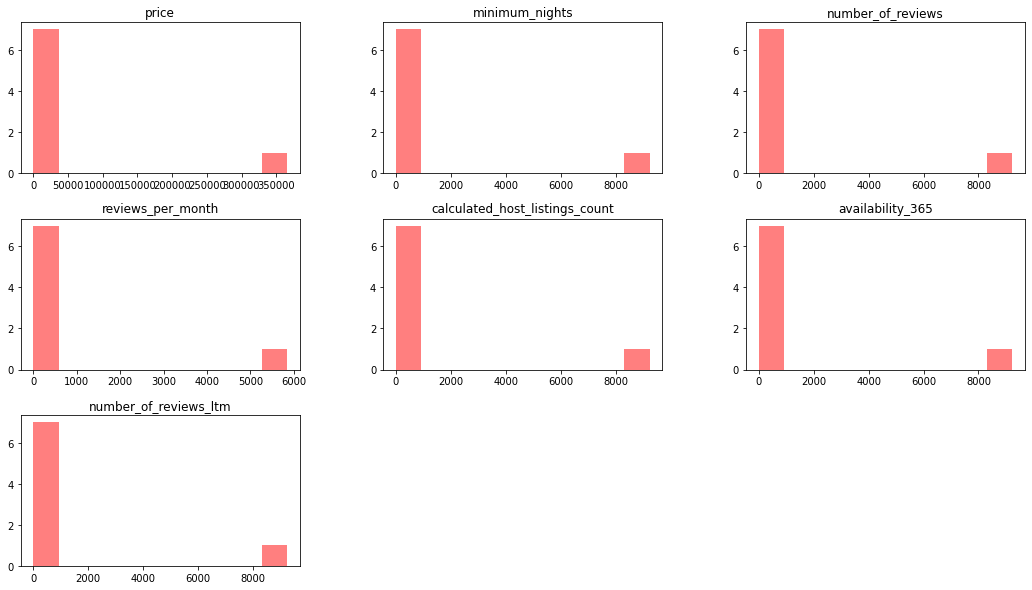

In [14]:
histograma(df2, (18,10))

<font color='red'>**ATENÇÃO:** o histograma só plota variáveis numéricas</font>

### **2.3.1. PONTOS FORA DA CURVA** 

> Analisando os gráficos anteriores podemos visualizar que existe "um buraco" em todos os quadros.
>
> Vamos olhar o `minimum_nights`, aonde se analizarmos "o buraco" é devido a distância entre o `terceiro quartil` e o valor máximo presente na coluna.

> Para evidenciar esse sentimento, vamos plotar um boxplot, e analisar a concentração nos quartis

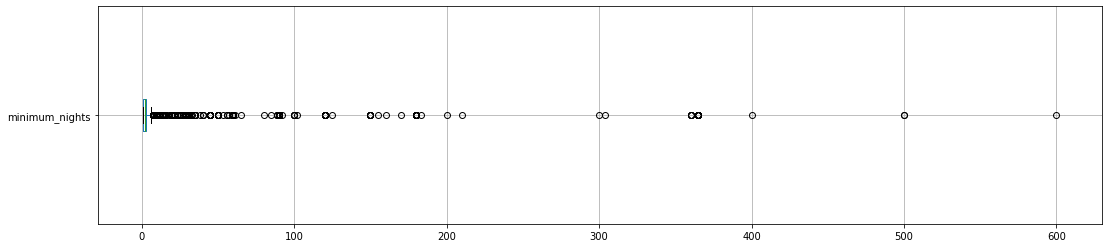

In [15]:
df.boxplot(column=['minimum_nights'], 
           vert=False, 
           figsize=(18, 4)
          );

> O objetivo desse artigo é mostrar se vale a pena usar Airbnb para uma viagem ao Chile, e por isso, vamos considerar um limite para a variável `minimum_nights` de 21 dias (3 semanas).

In [16]:
locais_minimo_noites_maior_21 = df.query('minimum_nights > 21').id.count()
percentual_locais_minimo_noites_maior_21 = round(locais_minimo_noites_maior_21 / linhas * 100,2)
print(f'''
Existem {locais_minimo_noites_maior_21} com quantidade mínima de noites maior que nossa necessidade, representando {percentual_locais_minimo_noites_maior_21}% de nossos dados.
Essas linhas serão deletadas a seguir, e um novo histograma será mostrado.
''')


Existem 591 com quantidade mínima de noites maior que nossa necessidade, representando 6.4% de nossos dados.
Essas linhas serão deletadas a seguir, e um novo histograma será mostrado.



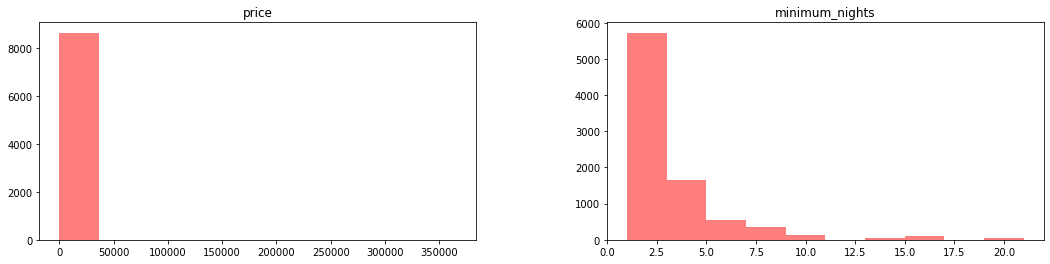

In [17]:
df3 = df.query('minimum_nights <= 21')
histograma(df3[['price', 'minimum_nights']], (18,4))

> Agora que temos a tabela limpa dos `outliers` na coluna `minimum_nights`, vamos aplicar a mesma técnica na coluna `price`

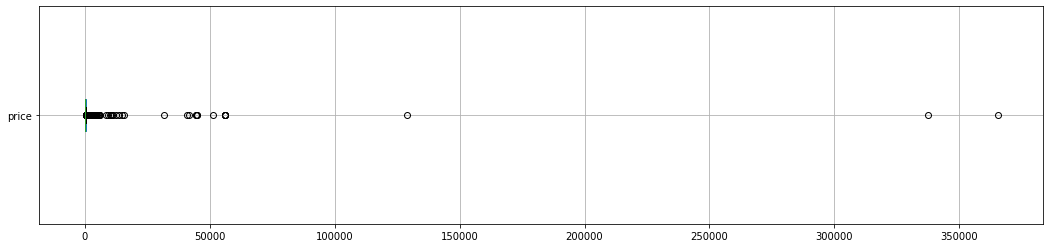

In [18]:
df3.boxplot(column=['price'], 
            vert=False, 
            figsize=(18, 4)
           );

In [19]:
describe_colunas_numericas_selecionadas(df3)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8640.000000,8640.000000,8640.000000,5534.000000,8640.000000,8640.000000,8640.000000
mean,536.800344,2.747222,17.053588,0.865390,2.998843,246.376852,3.987616
std,5861.117633,2.895445,38.803109,1.314981,4.365732,126.775223,12.700225
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,140.350000,1.000000,0.000000,0.100000,1.000000,139.000000,0.000000
50%,232.280000,2.000000,2.000000,0.380000,1.000000,300.000000,0.000000
75%,345.960000,3.000000,15.000000,1.110000,3.000000,364.000000,2.000000
max,365378.080000,21.000000,617.000000,23.620000,35.000000,365.000000,441.000000


In [20]:
locais_price_menor_um = df.query('price <= 1').id.count()
percentual_locais_price_menor_um = round(locais_price_menor_um / linhas * 100,2)
print(f'''
Existem {locais_price_menor_um} com quantidade mínima de noites maior que nossa necessidade, representando {percentual_locais_price_menor_um}% de nossos dados.
Essas linhas serão deletadas a seguir, e um novo histograma será mostrado.
''')


Existem 4 com quantidade mínima de noites maior que nossa necessidade, representando 0.04% de nossos dados.
Essas linhas serão deletadas a seguir, e um novo histograma será mostrado.



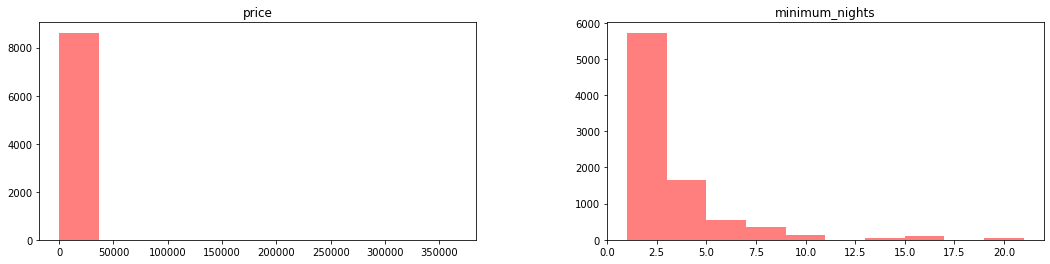

In [21]:
df4 = df3.query('price > 1')
histograma(df4[['price', 'minimum_nights']], (18,4))

In [22]:
describe_colunas_numericas_selecionadas(df4)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8636.000000,8636.000000,8636.000000,5532.000000,8636.000000,8636.000000,8636.000000
mean,537.048879,2.747800,17.060329,0.865665,2.999189,246.396480,3.989463
std,5862.463621,2.895931,38.810745,1.315139,4.366464,126.752255,12.702876
min,46.250000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,140.530000,1.000000,0.000000,0.100000,1.000000,139.000000,0.000000
50%,232.465000,2.000000,2.000000,0.380000,1.000000,300.000000,0.000000
75%,345.960000,3.000000,15.000000,1.110000,3.000000,364.000000,2.000000
max,365378.080000,21.000000,617.000000,23.620000,35.000000,365.000000,441.000000


> Vimos nos gráficos anteriores que existem alguns valores altos, e vamos verificar a seguir qual a linha de corte ideal de nosso dataset.
> 
> Vamos dividir em 50 percentis, e expurgar os imóveis com preço acima do maior percentil.

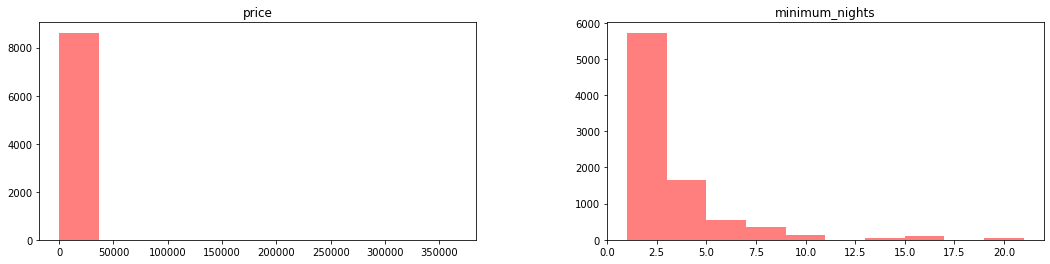

In [23]:
# Identificando os percentis
# Usamos 50 frações
# Vamos expurgar 2% maiores valores medianos
max_mediana_50 = np.percentile(list(df4.price), np.arange(0, 100, 2)).max()
df5 = df4.query('price < @max_mediana_50')
histograma(df4[['price', 'minimum_nights']], (18,4))

In [24]:
describe_colunas_numericas_selecionadas(df5)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8462.000000,8462.00000,8462.000000,5430.000000,8462.000000,8462.000000,8462.000000
mean,307.522797,2.73706,17.315765,0.877508,3.010281,246.120893,4.060978
std,305.199436,2.89896,39.149129,1.324069,4.371855,126.815785,12.821875
min,46.250000,1.00000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,139.500000,1.00000,0.000000,0.100000,1.000000,137.250000,0.000000
50%,224.850000,2.00000,2.000000,0.400000,1.000000,300.000000,0.000000
75%,337.270000,3.00000,15.000000,1.140000,3.000000,364.000000,2.000000
max,2233.890000,21.00000,617.000000,23.620000,35.000000,365.000000,441.000000


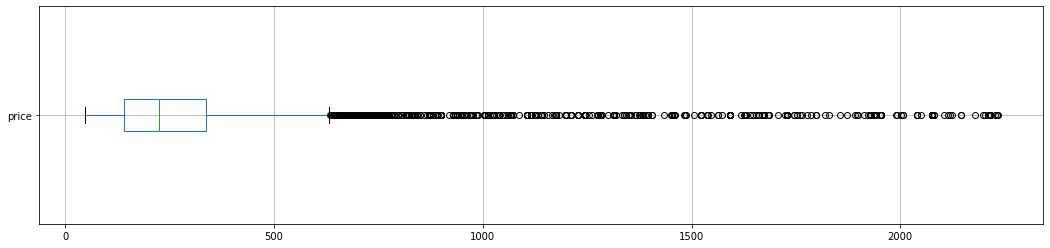

In [25]:
df5.boxplot(column=['price'], 
            vert=False, 
            figsize=(18, 4)
           );

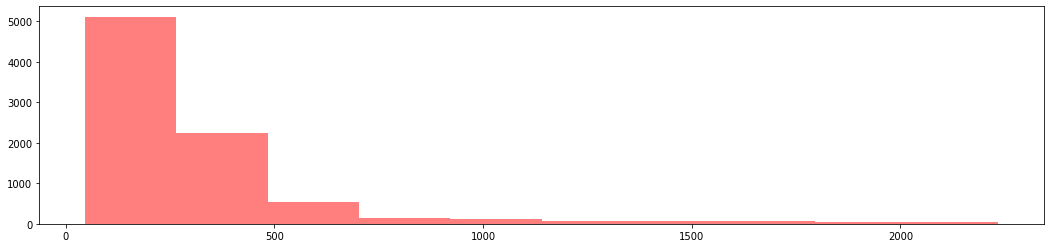

In [26]:
histograma(df5.price, (18,4))

> Agora podemos ter maior clareza sobre nossos dados, entendendo a distribuição deles, podemos avançar em nossas analises.

### 2.4. Qual a média dos preços de aluguel?

> Já mostramos na tabela `describe` apresentada algumas células acima, a distribuição de valores, mas, de maneira objetiva e rápida, veja quais são os valores minimo, máximo, médio e mediano constantes na coluna preço.

In [27]:
media = df5.price.mean().round(2)
mediana = df5.price.median().round(2)
maior = df5.price.max().round(2)
menor = df5.price.min().round(2)

print(f'''
O menor valor é R$...... {menor}
O maior valor é R$...... {maior}
O valor médio é R$...... {media}
O valor mediano é R$.... {mediana}
''')


O menor valor é R$...... 46.25
O maior valor é R$...... 2233.89
O valor médio é R$...... 307.52
O valor mediano é R$.... 224.85



### 2.5. Qual a correlação existente entre as variáveis?

> Vamos agora analisar a correlação entre todas as variáveis.
>
> O objetivo aqui é verificar se o incremento em uma variavél impacta em outra, positiva ou negativamente.

In [28]:
correlacao = df5[variaveis].corr()
correlacao

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.024463,-0.041880,-0.047646,0.085747,0.029359,-0.020628
minimum_nights,0.024463,1.000000,-0.016022,-0.113367,-0.077598,-0.099881,-0.077315
number_of_reviews,-0.041880,-0.016022,1.000000,0.664938,0.062858,-0.076084,0.646504
reviews_per_month,-0.047646,-0.113367,0.664938,1.000000,0.132380,-0.009956,0.754154
calculated_host_listings_count,0.085747,-0.077598,0.062858,0.132380,1.000000,0.056270,0.133588
availability_365,0.029359,-0.099881,-0.076084,-0.009956,0.056270,1.000000,-0.015901
number_of_reviews_ltm,-0.020628,-0.077315,0.646504,0.754154,0.133588,-0.015901,1.000000


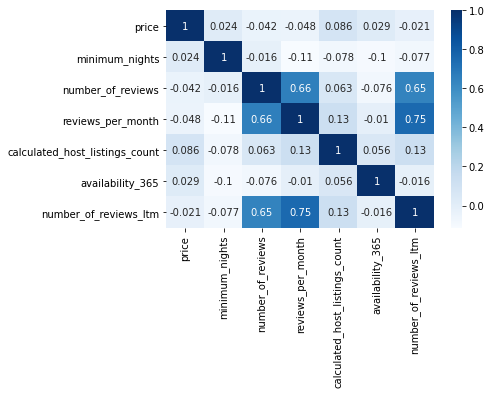

In [29]:
sns.heatmap(correlacao,
            cmap='Blues',
            annot=True
           );

> Analisando os dados acima, podemos ver que existe **SOMENTE** correlação nas variáveis que demonstram se houve avaliação.

### 2.6. Qual o Tipo de imóvel mais alugado no Airbnb?

> Dependendo do tipo de imóvel, você pode acondicionar mais ou menos pessoas, e por sua vez, dividir as custas por "cabeça".
>
> Na tabela a seguir apresentamos por ordem decrescente a quantidade de quartos, e o percentual do total de quartos:

In [30]:
tipos = pd.DataFrame(df5.room_type.value_counts())
tipos = tipos.rename(columns={'room_type':'qtd_quartos'})
tipos['perc'] = round(   tipos['qtd_quartos'] / df5.shape[0] * 100   ,2)
tipos

,qtd_quartos,perc
Entire home/apt,4681,55.32
Private room,3499,41.35
Shared room,184,2.17
Hotel room,98,1.16


> Mais da metade dos imóveis são apartamentos inteiros, mas não temos informação no número de quartos e/ou camas no dataset, dificultando a analise nesse ponto.

### **2.7. Qual a localidade mais cara do dataset?**



> Necessitamos saber aonde está o centro da distribuição de valores de preços cobrados por imóveis, mas, vamos agrupar por `neighbourhood` (bairro), para podermos ter uma ideia melhor sobre os preços.

In [31]:
# criando as duas colunas de nossa nova tabela
bairros_mais_caros_mediana = df5.groupby(['neighbourhood']).price.median()
bairros_mais_caros_qtd = df5.groupby(['neighbourhood']).id.count()

# criando uma tabela, com duas colunas e indice em comum
bairros_tabela = pd.DataFrame([bairros_mais_caros_mediana, bairros_mais_caros_qtd]).T

# Ordenando preços do maior para o menor
bairros_tabela = bairros_tabela.sort_values(by='price', ascending=False)

# Renomeando colunas
bairros_tabela = bairros_tabela.rename(columns={'price': 'preco_mediano', 'id':'qtd_imoveis'})

# Selecionando as 10 primeiras linhas
bairros_tabela.head(10)

,preco_mediano,qtd_imoveis
neighbourhood,,
Lo Barnechea,1210.850,401.0
Lo Espejo,358.320,2.0
Las Condes,297.520,1340.0
Vitacura,281.060,207.0
Cerro Navia,276.770,7.0
Providencia,252.960,1618.0
Pudahuel,242.170,57.0
Huechuraba,209.155,42.0
Recoleta,207.570,215.0


In [32]:
bairro_caro    = bairros_tabela.iloc[[0]].index[0]
bairro_caro_pm = bairros_tabela.iloc[[0]]['preco_mediano'][0]
bairro_caro_qt = bairros_tabela.iloc[[0]]['qtd_imoveis'][0]

print('-'*50,

f'''
O bairro mais caro de nosso dataset é {bairro_caro},
com o preço mediano de {bairro_caro_pm},
e com {bairro_caro_qt} imóveis disponíveis.
''',

'-'*50)

-------------------------------------------------- 
O bairro mais caro de nosso dataset é Lo Barnechea,
com o preço mediano de 1210.85,
e com 401.0 imóveis disponíveis.
 --------------------------------------------------


### **2.8. Aonde estão os imóveis no MAPA?**



> Para facilitar nossa localização no mapa, vamos visualizar os os imóveis, em escala de calor, ou seja, quando mais próximo ao vernmelho, maior a quantidade de imóveis disponíveis.

In [44]:
import folium
from folium.plugins import HeatMap

In [55]:
# Lista com todas as latitudes e longitudes
lat = df5.latitude.tolist()
lng = df5.longitude.tolist()
lat_lng_zip = list(zip(lat, lng))

# Centrando o mapa na primeira linha de nosso dataset
lat1 = df5.iloc[[0]]['latitude']
long1 = df5.iloc[[0]]['longitude']

# definições do mapa
m = folium.Map(
    location= (lat1, long1),
    tiles='cartodbpositron', # mais exemplos de tiles em: https://deparkes.co.uk/2016/06/10/folium-map-tiles/
    zoom_start=10
)

# carregando mapa
HeatMap(lat_lng_zip).add_to(m)
m

## 3. Conclusões


> Como podemos visualizar na última imagem plotada, o dataset é bem resumido, e qualquer conclusão está limitado a esse escopo.
>
> Visualizamos que existem imóveis caros, mas é extremamente possivel fazer uma viagem, pagando entre `200~300 BRL` a noite.
>
> Essa visualização em `BRL` permite ao analista Brasileiro, entender se o preço está "cabendo no bolso".

---
### Conheça meu trabalho

<a href="https://www.joviano.com">
<img src="https://raw.githubusercontent.com/jovianosilveira/img/master/joviano-silveira-site-logo.png" alt="joviano.com" width="5%">
</a>

<a href="https://www.youtube.com/jovianosilveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-youtube-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="http://www.linkedin.com/in/jovianosilveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-linkedin-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="https://www.instagram.com/jovi.silveira">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-instagram-logo.png?raw=true" alt="joviano.com" width="5%">
</a>

<a href="https://www.facebook.com/jovi.silveira.cursos">
<img src="https://github.com/jovianosilveira/img/blob/master/joviano-silveira-facebook-logo.png?raw=true" alt="joviano.com" width="5%">
</a>